<div style="background:#E9FFF6; color:#440404; padding:8px; border-radius: 4px; text-align: center; font-weight: 500;">IFQ619 - Data Analytics for Strategic Decision Makers (2024)</div>

# IFQ619 :: B2-StructuredAnalytics Tutorial Exercises

---
## Task 1

Using the structured analytics techniques demonstrated in this week's studio, work through the QDAVI cycle for the following business concern:


> **CONCERN:** A business is looking to launch an agricultural product in either Australia or New Zealand. However, management is unsure which country to start with.

### Question

What questions might the business be interested in answering, and how might we use data analytics to address these questions?

### Data

What data may be helpful in finding out the importance of agriculture to each country?

Perhaps, data that shows the contribution of agriculture to the economy:

1. Take a look at [GapMinder](https://www.gapminder.org/data/) - (based on [uw-madison resource](https://uw-madison-aci.github.io/python-novice-gapminder/39-plotting/))
2. Under "Choose individual indicators", navigate to "Agriculture, percent of GDP" (economy>sectors>agriculture) and download the CSV file.
3. Upload the CSV to your Jupyter files section with the 'upload' button into a 'data' directory.

In [2]:
# import the required library to load the data
import pandas as pd


#### Load the data

Now that we have the data file in our Jupyter environment, we can load the data out of the file into our notebook so that we can work with it.

In [3]:
file_path = "data/"
file_name = "agriculture_percent_of_gdp.csv"
index_column = "country"

ag_gdp_df = pd.read_csv(f"{file_path}{file_name}", index_col= index_column)

ag_gdp_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0178,0.0148,0.0125,0.0186,0.0239,0.0222,0.0276,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.8000,22.1000,20.6000,25.7000,26.4000,22.0000,25.8000,30.000,33.600,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.5100,7.5500,9.1200,9.8300,10.0000,8.6100,7.8800,9.950,11.500,13.600
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.6000,20.0000,19.8000,19.8000,19.0000,18.4000,18.4000,19.200,18.400,18.600
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5860,0.5380,0.5130,0.5220,0.5600,0.5460,0.5230,0.559,0.534,0.496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.3700,8.9800,8.3200,8.6400,9.9100,9.1500,9.1000,9.540,9.850,9.990
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.7000,17.7000,20.2000,25.1000,27.0000,28.7000,NaN,NaN,NaN,NaN
South Africa,9.04,9.32,8.96,8.84,7.65,7.43,7.7,8.49,7.14,6.67,...,1.9300,2.1300,2.2300,2.4100,2.4900,2.2600,1.9500,2.580,2.560,2.830


#### Select relevant data

Select the most recent 5 years. We can do this by getting a list of the columns, and selecting the last 5. However, we need to ensure that both countries have complete data for those years.

Select the relevant rows (Australia and NZ)

In [6]:
# get columns as a list and select recent 5 that have complete data for Aus and NZ
all_years = list(ag_gdp_df.columns)
recent5_years = all_years[-7:-2]
recent5_years

['2016', '2017', '2018', '2019', '2020']

In [7]:
ag_gdp5_df = ag_gdp_df[recent5_years]
ag_gdp5_df

,2016,2017,2018,2019,2020
country,,,,,
Aruba,0.0186,0.0239,0.0222,0.0276,NaN
Afghanistan,25.7000,26.4000,22.0000,25.8000,30.000
Angola,9.8300,10.0000,8.6100,7.8800,9.950
Albania,19.8000,19.0000,18.4000,18.4000,19.200
Andorra,0.5220,0.5600,0.5460,0.5230,0.559
...,...,...,...,...,...
Samoa,8.6400,9.9100,9.1500,9.1000,9.540
Yemen,25.1000,27.0000,28.7000,NaN,NaN
South Africa,2.4100,2.4900,2.2600,1.9500,2.580


We are only interested in Australia and New Zealand, so we don't need 189 rows. We can use the .loc function of the dataframe to obtain the row.

In [8]:
countries = ["Australia","New Zealand"]
ag_gdp5_df.loc[countries] # loc only works on the index I believe

,2016,2017,2018,2019,2020
country,,,,,
Australia,2.40,2.70,2.46,2.11,2.01
New Zealand,5.55,5.91,5.66,5.69,5.65


In [16]:
# Transpose the dataframe (with .T) to better suit analysis
au_nz_df = ag_gdp5_df.loc[countries].T
au_nz_df.index.name = "year" # give the index an appropriate name
au_nz_df

country,Australia,New Zealand
year,,
2016,2.40,5.55
2017,2.70,5.91
2018,2.46,5.66
2019,2.11,5.69
2020,2.01,5.65


### Analysis

Get a picture of the data, by using descriptives statistics

In [10]:
au_nz_df.describe()

country,Australia,New Zealand
count,5.000000,5.00000
mean,2.336000,5.69200
std,0.278083,0.13274
min,2.010000,5.55000
25%,2.110000,5.65000
50%,2.400000,5.66000
75%,2.460000,5.69000
max,2.700000,5.91000


In [26]:
au_nz_df.index

Index(['2016', '2017', '2018', '2019', '2020'], dtype='object', name='year')

In [38]:


years = list(au_nz_df.index)
yrs_str = ", ".join(years)
print(f"Agriculture as a percent of GDP for the years: {yrs_str}")
for country in countries:
    ds = au_nz_df[country].describe()
    mean_pc = ds["mean"]
    min_pc = ds["min"]
    max_pc = ds["max"]
    
    print(f"{country} mean: {mean_pc:2}%, min: {min_pc}% max: {max_pc}%")

Agriculture as a percent of GDP for the years: 2016, 2017, 2018, 2019, 2020
Australia mean: 2.336%, min: 2.01% max: 2.7%
New Zealand mean: 5.692%, min: 5.55% max: 5.91%


### Visualisation

Use plotly.express to create a line chart for the new dataframe

In [40]:
# Import the library required to use plotly express for visualisation
import plotly.express as px

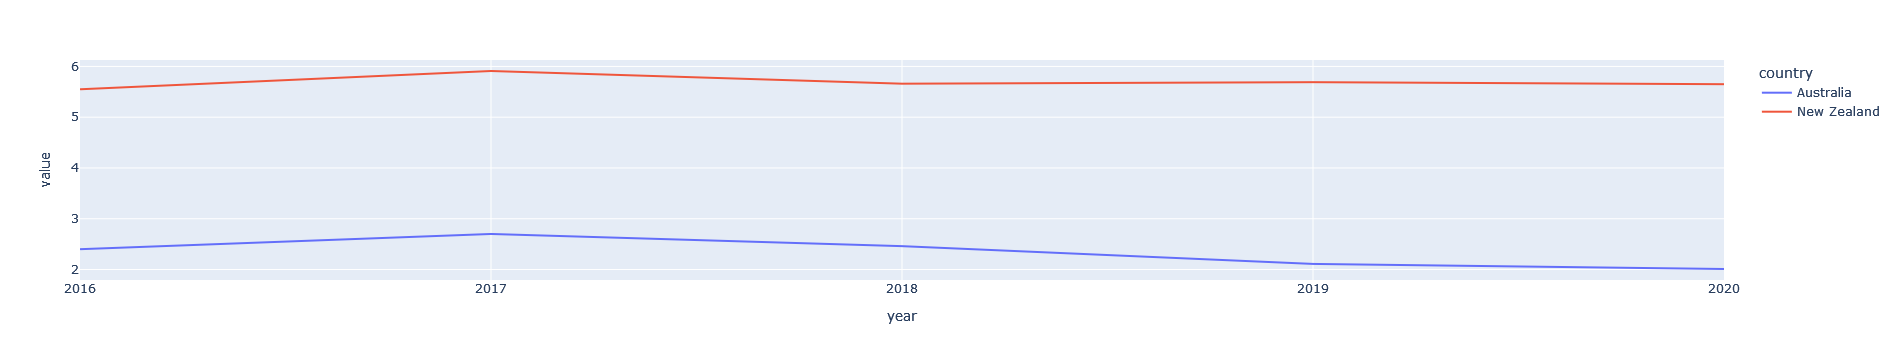

In [45]:
px.line(au_nz_df)

### Insights

What insights can you identify from the analysis above?
Can you address the business concern? To what extent?
What limiting factors might there be in using this analysis to address the concern? (think population of countries, recency of data, etc)

Australia appears to have a higher portion of the GDP, but also has a higher GDP. They are relatively steady, but both peaked in 2017 and dropped by more for Australia

Does not account for global trends in different parts of the country

Data is old

Is not GDP per capita

---
## Task 2

### Question 

> What sort of daily ups and downs does the stock market have?

### Data

The file NASDAQ100.csv in the data folder contains daily opening and closing prices of a US stock index called the NASDAQ 100 for the last year downloaded from [Yahoo Finance](https://au.finance.yahoo.com/quote/%5ENDX).

Load the the data from the file into a pandas dataframe. Notice that the column names from the file become the column names of the dataframe.

In [1]:
# import libraries (the same two as imported above)
import pandas as pd
import plotly.express as px

In [2]:
file_path = "data/"
file_name = "NASDAQ100.csv"
# Load the CSV file into a DataFrame
df = pd.read_csv(f"{file_path}{file_name}")

#### "Eyeballing" the data
Print the first 10 rows of data on your screen. Take a quick look to check it seems like good data.


In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/03/2023,12230.83984,12340.45020,11970.33984,11995.87988,11995.87988,5061790000
1,10/03/2023,12001.70020,12069.62012,11789.86035,11830.28027,11830.28027,6193500000
2,13/03/2023,11752.09961,12073.95996,11695.41016,11923.16992,11923.16992,6201490000
3,14/03/2023,12078.45996,12217.87012,12035.21973,12199.79004,12199.79004,5533120000
4,15/03/2023,12083.24023,12269.45020,12026.17969,12251.32031,12251.32031,5912430000
5,16/03/2023,12211.87012,12595.69043,12190.65039,12581.38965,12581.38965,5498920000
6,17/03/2023,12570.16016,12674.33984,12444.08008,12519.87988,12519.87988,7903090000
7,20/03/2023,12487.79004,12578.34961,12407.82031,12562.61035,12562.61035,4970630000
8,21/03/2023,12643.34961,12762.45020,12582.75977,12741.44043,12741.44043,4829870000
9,22/03/2023,12742.41016,12943.62012,12563.78027,12567.15039,12567.15039,4981590000


#### Checking for duplicates

This is "time series" data, so there should not be multiple rows for one day.

Run a command to check for duplicate rows (all values the same as another row). If you find any, delete the duplicate rows, keeping only one. (Hint: the dataframe object has a "duplicated" method.)

In [4]:
# Check duplicates

df[df.duplicated()]
# Useful function to know. Essentially the same as unique in R, but give the index

,Date,Open,High,Low,Close,Adj Close,Volume
91,19/07/2023,15888.16016,15932.04981,15781.95996,15826.34961,15826.34961,5112420000


In [ ]:
# Which row is duplicated? 
91

In [5]:
# Complete this line of code to remove the duplicate from the dataset.

df = df[~df.duplicated()]

# ~ functions simalarly to a NOT
# DataFrame.drop_duplicates Of course there is a function for this

In [6]:
# # Check duplicates again to verify it has been removed

df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


### Analysis

Create a new column equal to the the closing price minus the opening price. Call the new column "Daily Return".

In [7]:
# Create the new column
df['Daily Return'] = df["Close"] - df["Open"]

# Look at the new column
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,9/03/2023,12230.83984,12340.45020,11970.33984,11995.87988,11995.87988,5061790000,-234.95996
1,10/03/2023,12001.70020,12069.62012,11789.86035,11830.28027,11830.28027,6193500000,-171.41993
2,13/03/2023,11752.09961,12073.95996,11695.41016,11923.16992,11923.16992,6201490000,171.07031
3,14/03/2023,12078.45996,12217.87012,12035.21973,12199.79004,12199.79004,5533120000,121.33008
4,15/03/2023,12083.24023,12269.45020,12026.17969,12251.32031,12251.32031,5912430000,168.08008


#### Calculate some basic statistics

Calculate the mean and standard deviation of the "Daily Return" column.

Calculate how many days had a positive Daily Return and how many were negative.

In [8]:
# Calculate the mean and standard deviation of the 'Daily Return' column
mean = df['Daily Return'].std()
std = df['Daily Return'].mean()

print("Mean is:", mean, "Standard dev. is:", std)

Mean is: 129.77914278386694 Standard dev. is: 12.747515753968212


In [9]:
# Count the number of positive and negative values in the 'Daily Return' column
print((df['Daily Return'] > 0).value_counts())

# note this function value_counts, though it usually wouldn't be useful for me


Daily Return
True     145
False    107
Name: count, dtype: int64


### Visualisation

Create a histogram of the "Daily Return" column. Experiment with using different "bin" sizes from 5 to 20.

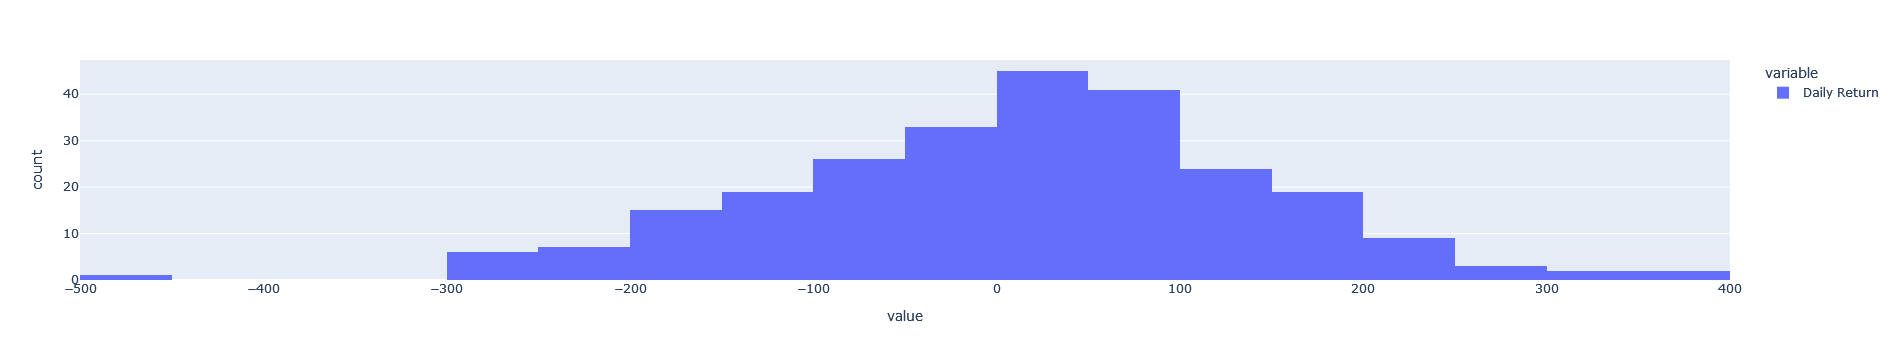

In [11]:
fig = px.histogram(df['Daily Return'], nbins=20)
fig.show()

# THose aren't the bin sizes, but the number of bins....

#This actually looks way more normally distribuited with more bins

#fig = px. distplot(df['Daily Return'])
#fig.show()

# Interpreting results

Is the mean very far from zero?

What sort of distribution does "Daily Return" seem to be?

Does there appear to be any asymmetry in the distribution?

What sort of investment strategy might have made money in this year? What sort of investment strategy might have lost money?

* Relatively... no
* Looks pretty normal to me
* Yes
* HUH... There is no information given on what investment strats are used.

---
## Task 3

### Examples of working with lists

One of the most powerful features of python is lists. A list is a data structure that has no special way to get values out except by position.

The next cell creates a list of numbers, but list elements can be any datatype.

In [12]:
# Here's a list

list1 = [0,1,2,3,4,5,6,7,8,9]


## Do some things with the list

If you are new to python, you might have to do some looking around on the course materials or the internet to find the write code to do the following tasks with list1, but it shouldn't be difficult.

### Add up the numbers in list1

In [13]:
sum(list1)

45

### What is the length of list1?

In [14]:
len(list1)

10

### So what is the mean of list1?

In [15]:
sum(list1)/len(list1)

4.5

In [ ]:
### Print the 5th number in list1? (remember there is a "0" element so the first item in the list is list[0])

In [16]:
list1[4]

4

You can "slice" a list to get different values easily

### What are the last 3 numbers in list1?

In [17]:
list1[7:10]

[7, 8, 9]

### Loop through all the elements of list1 using a for loop

In [18]:
for element in list1:
    print("This is:", element)

This is: 0
This is: 1
This is: 2
This is: 3
This is: 4
This is: 5
This is: 6
This is: 7
This is: 8
This is: 9


There is a shortcut way to do things with lists called "list comprehensions". Find out what they are.
### Use a list comprehension to print all the elements of list1 squared

In [19]:
[x**2 for x in list1]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

A list can be any combination of things.

### Add a word to list1

In [ ]:
list1.append('this list item contains some words')
list1

Now if you try to sum the elements in the list, however, we will get an error because you can't add strings and numbers.

An empty list looks like this: []

To empty list1 we can simply do: list1=[]



In [ ]:
list1=[]
list1